In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
np.random.seed(0)

In [120]:
m = 100
x = 6*np.random.rand(m, 1) - 3
y = 0.5*x**2 + x + 2 + np.random.rand(m,1)

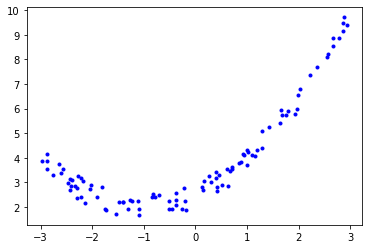

In [121]:
plt.plot(x,y, 'b.')

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
poly_feature = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_feature.fit_transform(x)

In [123]:
x[0]

array([0.29288102])

In [124]:
x_poly[0]

array([0.29288102, 0.08577929])

In [23]:
from sklearn.linear_model import LinearRegression

In [125]:
model = LinearRegression()
model.fit(x_poly, y)
model.intercept_, model.coef_

(array([2.57562084]), array([[0.98599899, 0.48349572]]))

In [145]:
X = np.linspace(-3, 3, 100)

In [127]:
X.shape

(100,)

In [106]:
X

array([-3.        , -2.92929293, -2.85858586, -2.78787879, -2.71717172,
       -2.64646465, -2.57575758, -2.50505051, -2.43434343, -2.36363636,
       -2.29292929, -2.22222222, -2.15151515, -2.08080808, -2.01010101,
       -1.93939394, -1.86868687, -1.7979798 , -1.72727273, -1.65656566,
       -1.58585859, -1.51515152, -1.44444444, -1.37373737, -1.3030303 ,
       -1.23232323, -1.16161616, -1.09090909, -1.02020202, -0.94949495,
       -0.87878788, -0.80808081, -0.73737374, -0.66666667, -0.5959596 ,
       -0.52525253, -0.45454545, -0.38383838, -0.31313131, -0.24242424,
       -0.17171717, -0.1010101 , -0.03030303,  0.04040404,  0.11111111,
        0.18181818,  0.25252525,  0.32323232,  0.39393939,  0.46464646,
        0.53535354,  0.60606061,  0.67676768,  0.74747475,  0.81818182,
        0.88888889,  0.95959596,  1.03030303,  1.1010101 ,  1.17171717,
        1.24242424,  1.31313131,  1.38383838,  1.45454545,  1.52525253,
        1.5959596 ,  1.66666667,  1.73737374,  1.80808081,  1.87

In [146]:
X = X.reshape(100,1)

In [108]:
x.shape

(100, 1)

In [37]:
X.shape

(100, 1)

In [169]:
X_poly = poly_feature.transform(X)

In [170]:
y_pred = model.predict(X_poly)

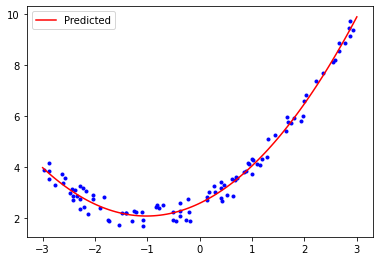

In [171]:
fig = plt.figure()
axis = fig.add_axes([.1, .1, .8, .8])
axis.plot(x, y, 'b.')
axis.plot(X, y_pred, 'r-', label='Predicted')
plt.legend()

## Learning curve

In [174]:
def get_poly(X, deg):
    poly_feature = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_feature.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    X_test = np.linspace(-3,3,100)
    X_test = X_test.reshape(100,1)
    X_test_poly = poly_feature.transform(X_test)
    y_predict = model.predict(X_test_poly)
    return y_predict

In [175]:
y1_pred = get_poly(x, 1)

In [176]:
y2_pred = get_poly(x, 2)

In [177]:
y300_pred = get_poly(x, 300)

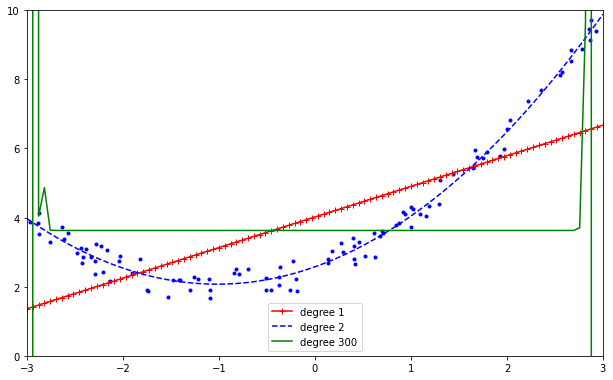

In [178]:
fig = plt.figure(figsize = (10,6))
axis = fig.add_axes([.1, .1, .8, .8])
axis.plot(x, y, 'b.')
axis.plot(X, y1_pred, 'r+-', label='degree 1')
axis.plot(X, y2_pred, 'b--', label='degree 2')
axis.plot(X, y300_pred, 'g-', label='degree 300')
plt.xlim(-3,3)
plt.ylim(0,10)
plt.legend()

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [187]:
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    train_error, test_error = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_test[:m])
        y_test_predict = model.predict(X_test)
        train_error.append(mean_squared_error(y_train_predict, y_train[:m])) 
        test_error.append(mean_squared_error(y_test_predict, y_test))
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(test_error), "b-", linewidth=3, label="val")

In [188]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)

ValueError: Found input variables with inconsistent numbers of samples: [20, 21]